#Data Visualization

In [21]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#loading train and test dataset
df=pd.read_csv('/content/train.csv.xls')
df.head(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,D
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,D
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,E
8,VID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,F
9,VID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,B


In [23]:
df.shape

(14999, 9)

In [24]:
df.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category     object
dtype: object

In [25]:
category={'A': 1,'B': 2,'C': 3,'D': 4,'E': 5,'F': 6,'G': 7,'H': 8,}
df["category"]=df["category"].map(category)
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [26]:
df=df[df.views!='F']
df=df[df.likes!='F']
df=df[df.dislikes!='F']
df=df[df.comment!='F']

In [27]:
df["views"]=pd.to_numeric(df["views"])
df["comment"]=pd.to_numeric(df["comment"])
df["likes"]=pd.to_numeric(df["likes"])
df["dislikes"]=pd.to_numeric(df["dislikes"])
df["adview"]=pd.to_numeric(df["adview"])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14637 non-null  object
 1   adview     14637 non-null  int64 
 2   views      14637 non-null  int64 
 3   likes      14637 non-null  int64 
 4   dislikes   14637 non-null  int64 
 5   comment    14637 non-null  int64 
 6   published  14637 non-null  object
 7   duration   14637 non-null  object
 8   category   14637 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 1.1+ MB


In [29]:
column_vidid=df['vidid']

#Label Encoder

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [32]:

import pandas as pd
import numpy as np

# Define the checki function
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

# Convert the duration column to seconds
df['duration'] = df['duration'].apply(lambda x: checki(x).split(':')).apply(lambda x: int(x[0])*3600 + int(x[1])*60 + int(x[2]))
# Print the updated DataFrame
print(df.head())

       vidid  adview    views  likes  dislikes  comment   published  duration  \
0  VID_18655      40  1031602   8523       363     1095  2016-09-14       457   
1  VID_14135       2     1707     56         2        6  2016-10-01       570   
2   VID_2187       1     2023     25         0        2  2016-07-02       136   
3  VID_23096       6   620860    777       161      153  2016-07-27       262   
4  VID_10175       1      666      1         0        0  2016-06-29        31   

   category  
0         6  
1         4  
2         3  
3         8  
4         4  


In [33]:
#df['duration']=LabelEncoder().fit_transform(df['duration'])
df['vidid']=LabelEncoder().fit_transform(df['vidid'])
df['published']=LabelEncoder().fit_transform(df['published'])

In [34]:
df.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


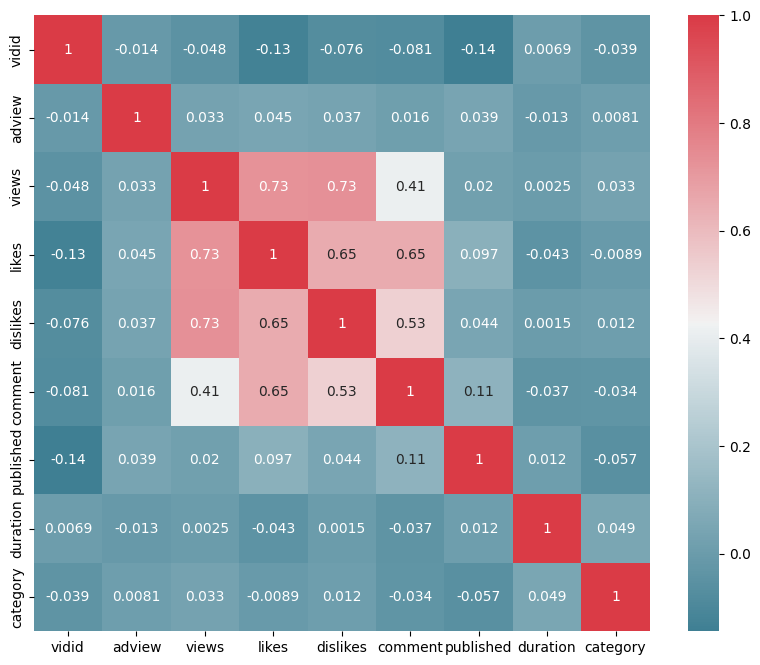

In [35]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14637 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   vidid      14637 non-null  int64
 1   adview     14637 non-null  int64
 2   views      14637 non-null  int64
 3   likes      14637 non-null  int64
 4   dislikes   14637 non-null  int64
 5   comment    14637 non-null  int64
 6   published  14637 non-null  int64
 7   duration   14637 non-null  int64
 8   category   14637 non-null  int64
dtypes: int64(9)
memory usage: 1.6 MB


In [37]:
Y_train = pd.DataFrame(data = df.iloc[:, 1].values, columns = ['target'])
df=df.drop(["adview"],axis=1)
df=df.drop(["vidid"],axis=1)
df=df.drop(["published"],axis=1)
df.head()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Y_train, test_size=0.2, random_state=42)

X_train.shape
X_train.describe()

,views,likes,dislikes,comment,duration,category
count,1.170900e+04,11709.000000,11709.000000,11709.000000,11709.000000,11709.000000
mean,7.185645e+05,2792.131694,258.678965,417.458622,1045.680758,4.615936
std,2.852188e+06,9069.358559,1081.161583,1585.737092,2344.570145,1.573283
min,4.900000e+01,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.165300e+04,87.000000,7.000000,7.000000,185.000000,4.000000
50%,1.619260e+05,458.000000,38.000000,46.000000,326.000000,4.000000
75%,5.772490e+05,1871.000000,166.000000,228.000000,729.000000,6.000000
max,1.380479e+08,283824.000000,49449.000000,75045.000000,42317.000000,8.000000


In [38]:
df.head()

,views,likes,dislikes,comment,duration,category
0,1031602,8523,363,1095,457,6
1,1707,56,2,6,570,4
2,2023,25,0,2,136,3
3,620860,777,161,153,262,8
4,666,1,0,0,31,4


# MIN-MAX SCALER

In [39]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train.mean()

0.09451823114499713

In [40]:
# Evaluation Metrics
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

#**Model** **Training**

# Linear Regression

In [41]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 5048.132127368649
Mean Squared Error: 10890065508.22383
Root Mean Squared Error: 104355.4766565887


# Support Vector Regressor

In [42]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, supportvector_regressor)

Mean Absolute Error: 3478.0474190927316
Mean Squared Error: 10901268741.962938
Root Mean Squared Error: 104409.14108430802


# Descision Tree Regressor

In [43]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 6776.743283242259
Mean Squared Error: 12958458949.496622
Root Mean Squared Error: 113835.22719042916


# Random Forest Regressor

In [44]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

Mean Absolute Error: 5530.726841612953
Mean Squared Error: 10950357848.339207
Root Mean Squared Error: 104643.95753381657


# ANN

In [45]:
# Artificial Neural Network
from tensorflow import keras
from keras.layers import Dense

In [46]:
ann = keras.models.Sequential([
                                Dense(6, activation="relu",
                                input_shape=X_train.shape[1:]),
                                Dense(6,activation="relu"),
                                Dense(1)
                                ])

optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 2ms/step - loss: 767619584.0000 - mean_squared_error: 767619584.0000
Epoch 2/100
366/366 [==============================] - 1s 2ms/step - loss: 767617472.0000 - mean_squared_error: 767617472.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767611008.0000 - mean_squared_error: 767611008.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767595072.0000 - mean_squared_error: 767595072.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767557824.0000 - mean_squared_error: 767557824.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767504064.0000 - mean_squared_error: 767504064.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767439424.0000 - mean_squared_error: 767439424.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767363456.0000 - mean_squared_error:

In [47]:
#Saving Scikitlearn models
import joblib
joblib.dump(supportvector_regressor, "SVR_youtubeadview.pkl")
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

#now testing

In [48]:
dft = pd.read_csv("/content/test.csv.xls")

In [49]:
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [50]:
dft.shape

(8764, 8)

In [51]:
from keras.models import load_model
model = load_model("ann_youtubeadview.h5")

In [53]:
# Removing character "F" present in data
dft=dft[dft.views!='F']
dft=dft[dft.likes!='F']
dft=dft[dft.dislikes!='F']
dft=dft[dft.comment!='F']

In [54]:
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [55]:
dft.shape

(8549, 8)

In [56]:
# Assigning each category a number for Category feature
category={'A': 1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
dft["category"]=dft["category"].map(category)
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [57]:

import pandas as pd
import numpy as np

# Define the checki function
def checki(x):
  y = x[2:]
  h = ''
  m = ''
  s = ''
  mm = ''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if(i=="H"):
        h = mm
        mm = ''
      elif(i == "M"):
        m = mm
        mm = ''
      else:
        s = mm
        mm = ''
  if(h==''):
    h = '00'
  if(m == ''):
    m = '00'
  if(s==''):
    s='00'
  bp = h+':'+m+':'+s
  return bp

# Convert the duration column to seconds
dft['duration'] = dft['duration'].apply(lambda x: checki(x).split(':')).apply(lambda x: int(x[0])*3600 + int(x[1])*60 + int(x[2]))
# Print the updated DataFrame
print(df.head())


     views  likes  dislikes  comment  duration  category
0  1031602   8523       363     1095       457         6
1     1707     56         2        6       570         4
2     2023     25         0        2       136         3
3   620860    777       161      153       262         8
4      666      1         0        0        31         4


In [58]:
# Convert values to integers for views, likes, comments, dislikes and adview
dft["views"] = pd.to_numeric(dft["views"])
dft["comment"] = pd.to_numeric(dft["comment"])
dft["likes"] = pd.to_numeric(dft["likes"])
dft["dislikes"] = pd.to_numeric(dft["dislikes"])
column_vidid=dft['vidid']

# Endoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
dft['vidid']=LabelEncoder().fit_transform(dft['vidid'])
dft['published']=LabelEncoder().fit_transform(dft['published'])
dft.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


In [59]:
dft=dft.drop(["vidid"],axis=1)
dft=dft.drop(["published"],axis=1)
dft.head()

,views,likes,dislikes,comment,duration,category
0,440238,6153,218,1377,449,2
1,1040132,8171,340,1047,389,6
2,28534,31,11,1,2274,4
3,1316715,2284,250,274,595,7
4,1893173,2519,225,116,188,2


In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_test = dft
X_test=scaler.fit_transform(X_test)
X_test.mean()

0.09451388220327671

In [61]:
prediction = model.predict(X_test)

268/268 [==============================] - 1s 2ms/step


In [62]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8549 entries, 0 to 8548
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8549 non-null   float32
dtypes: float32(1)
memory usage: 33.5 KB


In [63]:
prediction = prediction.rename(columns={0: "Adview"})

In [64]:
prediction.head()

,Adview
0,1374.920410
1,1960.367676
2,1486.137207
3,2069.630859
4,1384.609741


In [65]:
prediction.to_csv('predictions.csv')

#pickle and json

In [66]:
import pickle

# Save the model to a pickle file
with open('random_forest_youtubeadview.pkl','wb') as f:
  pickle.dump(random_forest,f)
with open('label_encoder.pickle', 'wb') as file:
    pickle.dump(LabelEncoder, file)
with open('scaler.pickle', 'wb') as file:
    pickle.dump(scaler, file)

In [67]:
import json

columns = {
    'data_columns' : [col.lower() for col in dft.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

#random dataset

In [68]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load the trained model
with open('/content/random_forest_youtubeadview.pkl', 'rb') as file:
    random_forest = pickle.load(file)

# Define the new user-given data as a dictionary
new_data = {
    'views': 130,
    'likes': 130,
    'dislikes': 311,
    'comment': 3433,
    'duration': 103,
    'category': 3,
}

# Convert the new data to a pandas DataFrame
new_df = pd.DataFrame([new_data])

# Convert the categorical variable to numerical using LabelEncoder
le = LabelEncoder()
new_df['category'] = le.fit_transform(new_df['category'])

# Normalize the numerical variables using MinMaxScaler
scaler = MinMaxScaler()
numeric_cols = ['views', 'likes', 'dislikes', 'duration','comment']
new_df[numeric_cols] = scaler.fit_transform(new_df[numeric_cols])

# Make the prediction using the random forest model
prediction = random_forest.predict(new_df)

# Print the prediction
print("Prediction:", prediction[0])

Prediction: 489.55760509400113
